<a href="https://colab.research.google.com/github/varalakshmiarcot/StoreitemDemandForecasting-using-Time-Series/blob/master/Store_item_demand_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Item Demand Forecast Using prophet

![Imgur](https://i.imgur.com/aooy8xP.gif)

## Table of Contents
1. [Objective](#section1)<br>
2. [Data Loading and Visualization](#section2)<br>
3. [Fit the model using Prophet object ](#section3)<br>
4. [Future sales predictions for next one year](#section4)<br>
5. [Plot the sales predictions for next one year](#section5)<br>
6. [Forecasted Sales Values for next one year](#section6)<br>
7. [Forecasting Sales Predictions for next 10 Years](#section7)<br>
8. [Plot the sales predictions for next 10 years](#section8)<br>
9. [Forecasted Sales Values for next 10 years](#section9)<br>

###1.Objective
- Build a model to forecast the demand (store item) using facebook prophet.
- The data is classified in date/time, store, name, and sales per day

###2.Data Loading and Visualization

__Import the dataset__ 

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
df_store = pd.read_csv('https://raw.githubusercontent.com/varalakshmiarcot/StoreitemDemandForecasting-using-Time-Series/master/Store_Item_demand_forecast.csv')
df_store.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Store item data deals with 4 columns,
- one is temporal i.e: __date__ in this case,
- two and third are __store__ and __item__
- another is the value to be forecasted ie: __sales__. <br/>

In [0]:
#Remove store and item
df_store = df_store.drop(['store','item'], axis=1)
df_store.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [0]:
df_store.shape

(913000, 2)

In [0]:
# Taking 1Lakh records for forecasting
df = df_store.tail(100000)

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
# Renaming the columns with ds and y
df.columns  = ['ds', 'y']

In [0]:
df.head()

,ds,y
813000,2014-03-07,56
813001,2014-03-08,53
813002,2014-03-09,58
813003,2014-03-10,53
813004,2014-03-11,55


###3.Fit the model using Prophet object

Fit the model by instantiating a new Prophet object m. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the  dataframe.

In [0]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###4.Future predictions of sales for next one year

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction for one year is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet make_future_dataframe.

In [0]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
100360,2018-12-27
100361,2018-12-28
100362,2018-12-29
100363,2018-12-30
100364,2018-12-31


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
forecast = m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,42.098403,-6.153947,54.096604,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
1,2013-01-01,42.098403,-5.381684,53.190835,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
2,2013-01-01,42.098403,-5.858626,53.777998,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
3,2013-01-01,42.098403,-5.562108,53.045164,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
4,2013-01-01,42.098403,-3.192323,53.709035,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159


###5.Plot the predictions of sales for next one year

Plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

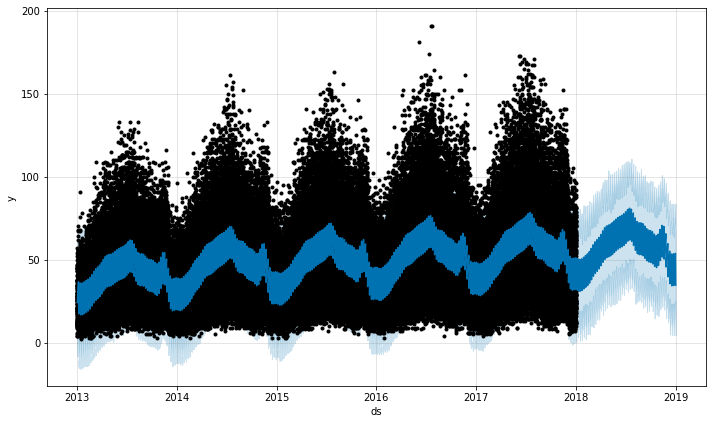

In [0]:
fig1 = m.plot(forecast)


Plot the forecast components, you can use the Prophet of plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 

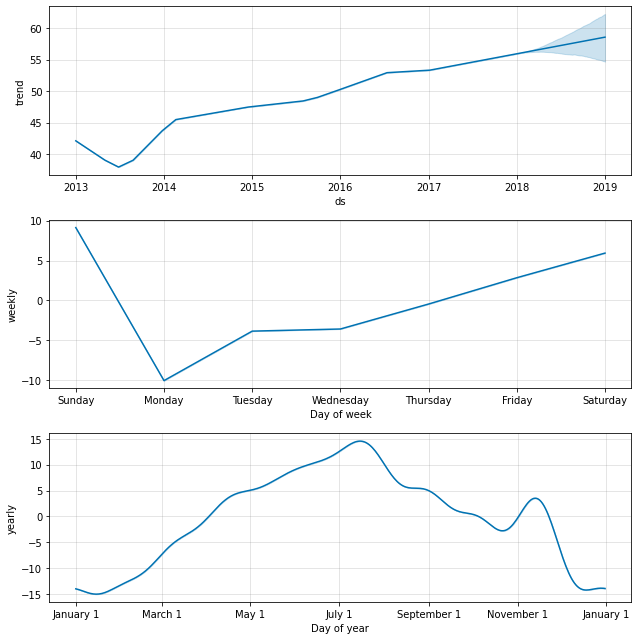

In [0]:
fig2 = m.plot_components(forecast)


From Forecasted plots,
- There is increase in trend. 
- As per yearly forecast,sales increased from January to July, and then downtrend upto December.
- As per weekly wise, sales increased from Monday to Saturday and then dcreased to Sunday and vice versa

In [0]:
# Extract columns ds and yhat of prediction
forecast_item = forecast[['ds','yhat']]

In [0]:
forecast_item.tail()

,ds,yhat
100360,2018-12-27,44.207925
100361,2018-12-28,47.525512
100362,2018-12-29,50.618522
100363,2018-12-30,53.804166
100364,2018-12-31,34.609590


In [0]:
#Renaming columns of predictions and original with same column name
forecast_item1 = forecast_item.rename(columns = {'yhat' : 'y'})

In [0]:
df.tail()

,ds,y
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62
912999,2017-12-31,82


In [0]:
# Merging of original nad forecasted dataframes
df_merge = pd.concat([df,forecast_item1])

In [0]:
df_merge

,ds,y
813000,2014-03-07,56.000000
813001,2014-03-08,53.000000
813002,2014-03-09,58.000000
813003,2014-03-10,53.000000
813004,2014-03-11,55.000000
...,...,...
100360,2018-12-27 00:00:00,44.207925
100361,2018-12-28 00:00:00,47.525512
100362,2018-12-29 00:00:00,50.618522
100363,2018-12-30 00:00:00,53.804166


###6.Forecasted Sales Values for next one year

In [0]:
#Infer same date format
from datetime import datetime
df_merge['ds'] = pd.to_datetime(df_merge['ds'],infer_datetime_format = True)
df_merge

,ds,y
813000,2014-03-07,56.000000
813001,2014-03-08,53.000000
813002,2014-03-09,58.000000
813003,2014-03-10,53.000000
813004,2014-03-11,55.000000
...,...,...
100360,2018-12-27,44.207925
100361,2018-12-28,47.525512
100362,2018-12-29,50.618522
100363,2018-12-30,53.804166


###7.Forecasting Sales Values for next 10 Years


In [0]:
future_10years = m.make_future_dataframe(periods=3650)
future_10years.tail()

,ds
103645,2027-12-25
103646,2027-12-26
103647,2027-12-27
103648,2027-12-28
103649,2027-12-29


In [0]:
forecast_10years = m.predict(future_10years)
forecast_10years.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,42.098403,-4.318622,52.418580,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
1,2013-01-01,42.098403,-4.387643,53.534936,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
2,2013-01-01,42.098403,-6.126519,54.677768,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
3,2013-01-01,42.098403,-5.908386,55.295272,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159
4,2013-01-01,42.098403,-5.925948,53.581315,42.098403,42.098403,-17.825245,-17.825245,-17.825245,-3.843201,-3.843201,-3.843201,-13.982044,-13.982044,-13.982044,0.0,0.0,0.0,24.273159


###8.Plot the sales predictions for next 10 years 

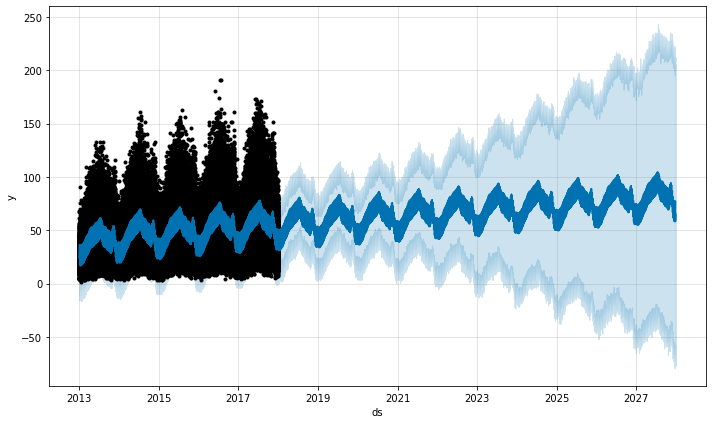

In [0]:
fig1 = m.plot(forecast_10years)

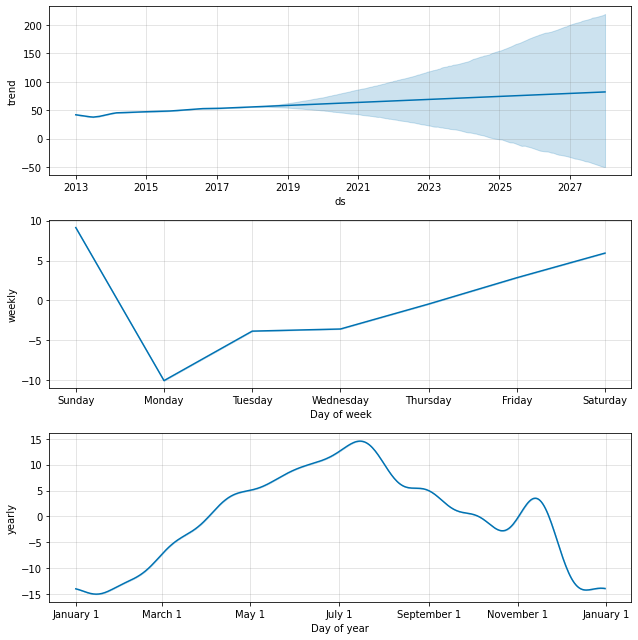

In [0]:
fig2 = m.plot_components(forecast_10years)

In [0]:
forecast_item10years = forecast_10years[['ds','yhat']]
forecast_item10years = forecast_item10years.rename(columns = {'yhat' : 'y'})
df_merge10years = pd.concat([df,forecast_item10years])

###9.Forecasted Sales Values for next 10 years <a name = "Forecasted Sales Values for 10 years">


In [0]:
from datetime import datetime
df_merge10years['ds'] = pd.to_datetime(df_merge10years['ds'],infer_datetime_format = True)
df_merge10years

,ds,y
813000,2014-03-07,56.000000
813001,2014-03-08,53.000000
813002,2014-03-09,58.000000
813003,2014-03-10,53.000000
813004,2014-03-11,55.000000
...,...,...
103645,2027-12-25,74.254704
103646,2027-12-26,77.499286
103647,2027-12-27,58.369098
103648,2027-12-28,64.594512
